# IDEA

The average trip duration of single time customers is more than that of the subscribers, and this indicates that a single time customer would make better maximize the unilization than a subscriber.

# Null Hypothesis (H0)

H0: T(customer) <= T(subscriber)

The mean trip duration of single time customers over a week is less than or equal to the mean trip duration of the subscribers over a week.

# Alternate Hypothesis (H1)

H1: T(customer) > T(subscriber)

The mean trip duration of single time customers over a week is more than the mean trip duration of the subscribers over a week.


Significance level: α = 0.05

In [1]:
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

In [3]:
os.getenv("PUIDATA")

'/home/cusp/jz2792/PUIdata'

In [4]:
def getCitiBikeCSV(datestring):
    print "Downloading", datestring
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [5]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [12]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1
5,332,1/1/2016 00:01:19,1/1/2016 00:06:51,3104,Kent Ave & N 7 St,40.720577,-73.961502,389,Broadway & Berry St,40.710446,-73.965251,15788,Subscriber,1984.0,1
6,2321,1/1/2016 00:01:27,1/1/2016 00:40:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3164,Columbus Ave & W 72 St,40.777057,-73.978985,24183,Subscriber,1963.0,1
7,694,1/1/2016 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1
8,1376,1/1/2016 00:03:12,1/1/2016 00:26:09,527,E 33 St & 2 Ave,40.744023,-73.976056,259,South St & Whitehall St,40.701221,-74.012342,23933,Subscriber,1963.0,1
9,615,1/1/2016 00:03:43,1/1/2016 00:13:59,432,E 7 St & Avenue A,40.726218,-73.983799,311,Norfolk St & Broome St,40.717227,-73.988021,23993,Subscriber,1971.0,1


In [13]:
df['date'] = pd.to_datetime(df['starttime'])
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [16]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [17]:
df.head()

,tripduration,usertype,date
0,923,Subscriber,2016-01-01 00:00:41
1,379,Subscriber,2016-01-01 00:00:45
2,589,Subscriber,2016-01-01 00:00:48
3,889,Subscriber,2016-01-01 00:01:06
4,1480,Subscriber,2016-01-01 00:01:12


In [18]:
fig=pl.figure(figsize(5,5))
p = df.groupby(['usertype']).mean()

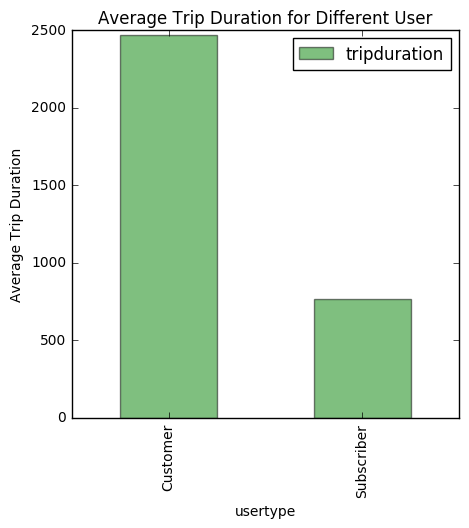

In [21]:
p.plot(kind='bar',color = "green", alpha = 0.5)
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for Different User')

Figure 1: Average Trip Duration for Different User Type

In [22]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()

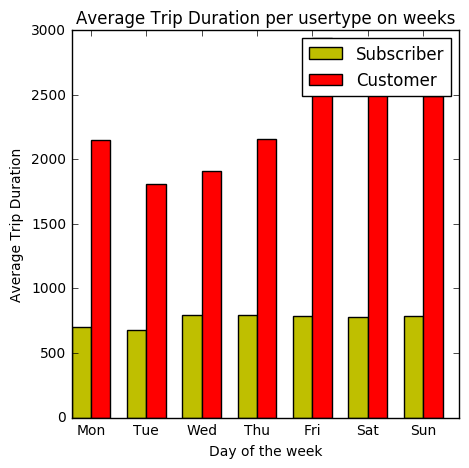

In [27]:
#fig=pl.figure(figsize(8,8))
fig, ax = pl.subplots()

#pl.xlim(0,3000)
width = 0.35  
rects1 = ax.bar( sub.index.values , sub.tripduration, width, color='y')
rects2 = ax.bar(cus.index.values + width, cus.tripduration, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weeks')
ax.set_xticks(cus.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))

Figure 2: Average Trip Duration for different user types over a week period